# Chapter 5: Chemical Bonding and Numerical Integration

The covalent bond plays a central role in the chemical sciences, dictating the chemical and physical properties of organic matter. It also plays an important role in inorganic, solid-state, and materials chemistry. The covalent bond is a quantum mechanical phenomenon where electrons in atomic orbitals are shared between atoms, causing these atomic orbitals to hybridize and form molecular orbitals. The hybridization of atomic orbitals is primarily governed by the energetic similarity of the atomic orbitals involved and their spatial proximity and orientation. In quantum chemistry, the latter is quantified using the overlap integral, which takes the following form:

$$
S = \int_0^{\infty} \int_0^{\pi} \int_0^{2\pi} \psi_i^*(r, \theta, \phi) \psi_j(r, \theta, \phi) r^2 \sin(\theta) dr d\theta d\phi
$$

Here, $\psi_i$ and $\psi_j$ are the atomic orbitals of atoms $i$ and $j$, respectively. These atomic orbitals are written in spherical coordinates, where the volume element of integration is $r^2 \sin(\theta) dr d\theta d\phi$. We will come back to this, but first, let us discuss what an integral is.

## Analytical vs. Numerical Integration

### What Is an Integral?

The formal definition of a *Riemann integral* is the limit of the sum of areas of rectangles under a curve. The integral of a function $f(x)$ over an interval $[a, b]$ is given by:

$$
\int_a^b f(x) dx = \lim_{n \to \infty} \sum_{i=1}^{n} f(x_i) \Delta x
$$

In other words, an integral is a sum with really small increments (*i.e.*, as small as possible). Therefore, calculating an integral numerically amounts to computing the area of a series of rectangles along $x$, where the height of the rectangle is the function $y$ value at that point. There are several methods to achieve an accurate value of the integral with the fewest number of computations, such as the trapezoidal rule, Simpson's rule, and Gaussian quadrature. In this lecture, we will focus on the Riemann sum when we write our integration codes and then move on to the trapezoidal rule implemented in Scipy and NumPy.

### Analytical Integration

Let's consider the function $f(x) = x^2$ over the interval $[0, 1]$. The integral of this function is:

$$
\int_0^1 x^2 dx = (1/3) x^3 \Big|_0^1 = 1/3
$$

### Numerical Integration

Let's calculate this integral numerically using a Riemann sum with 10, 100, and 1000 rectangles.

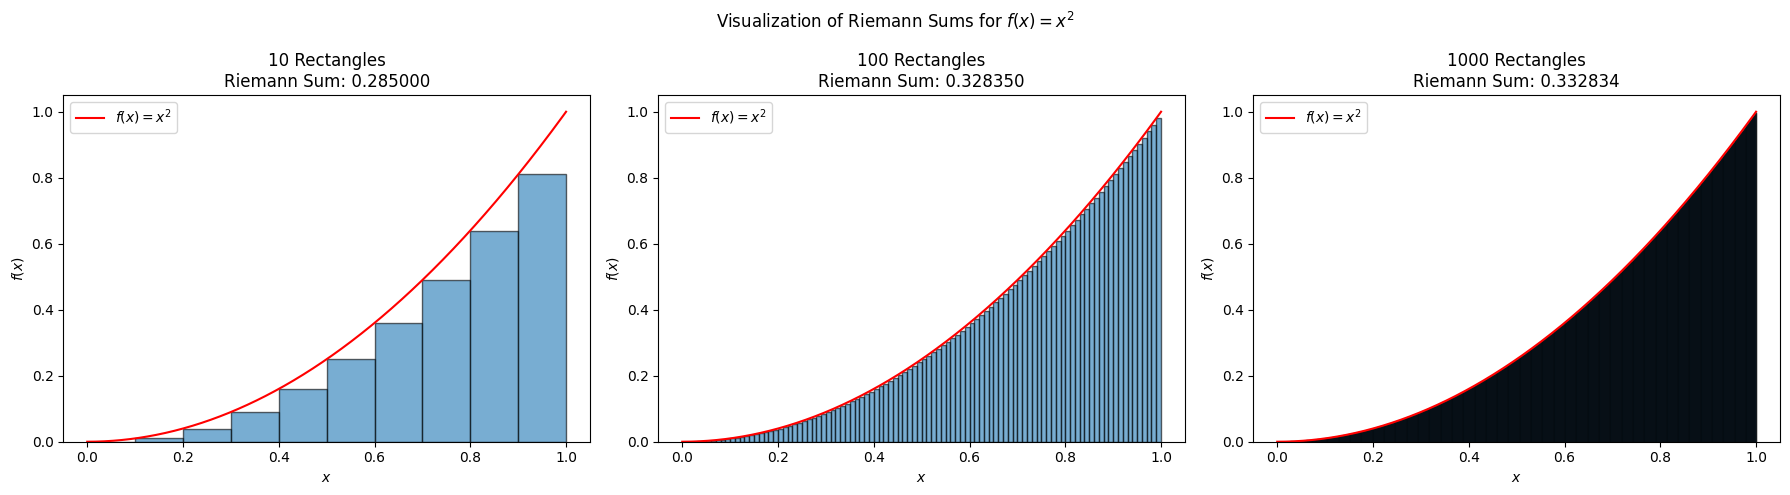

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = x^2
def f(x):
    return x**2

# Define the Riemann sum function
def riemann_sum(g, a, b, n):
    """
    Computes the Riemann sum of a function over a given interval.

    Parameters:
    g (function): The function to integrate.
    a (float): The start of the interval.
    b (float): The end of the interval.
    n (int): The number of subdivisions.

    Returns:
    tuple: The Riemann sum, the x-values used for the sum, and the width of each subdivision (dx).
    """
    x = np.linspace(a, b, n, endpoint=False)
    dx = (b - a) / n
    return np.sum(g(x) * dx), x, dx

# Interval [0, 1]
a = 0
b = 1

# Number of rectangles
n_values = [10, 100, 1000]

# Prepare the plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 3 subplots side by side
fig.suptitle("Visualization of Riemann Sums for $f(x) = x^2$")

# Calculate and plot the Riemann sums
for i, n in enumerate(n_values):
    riemann_sum_value, x, dx = riemann_sum(f, a, b, n)
    axs[i].bar(x, f(x), width=dx, align="edge", alpha=0.6, edgecolor="black")
    axs[i].plot(np.linspace(a, b, 1000), f(np.linspace(a, b, 1000)), "r-", label="$f(x) = x^2$")
    axs[i].set_title(f"{n} Rectangles\nRiemann Sum: {riemann_sum_value:.6f}")
    axs[i].set_xlabel("$x$")
    axs[i].set_ylabel("$f(x)$")
    axs[i].legend()

# Format and display the plot
plt.tight_layout()
plt.show()

As expected from the definition of an integral, the Riemann sum converges to the exact value of the integral as the number of rectangles increases.

### Symmetry and Integration

Now, let's consider the function $f(x) = \sin(x)$ over the interval $[-\pi, \pi]$. Let's calculate this integral numerically using a Riemann sum with 10, 100, and 1000 rectangles.

```{admonition} Wait!
:class: warning
Before we proceed, can you guess the value of this integral? What can you say about the symmetry of the sine function around the center of the interval of integration?
```

Now that we have a guess, let's calculate the integral and compare the results.

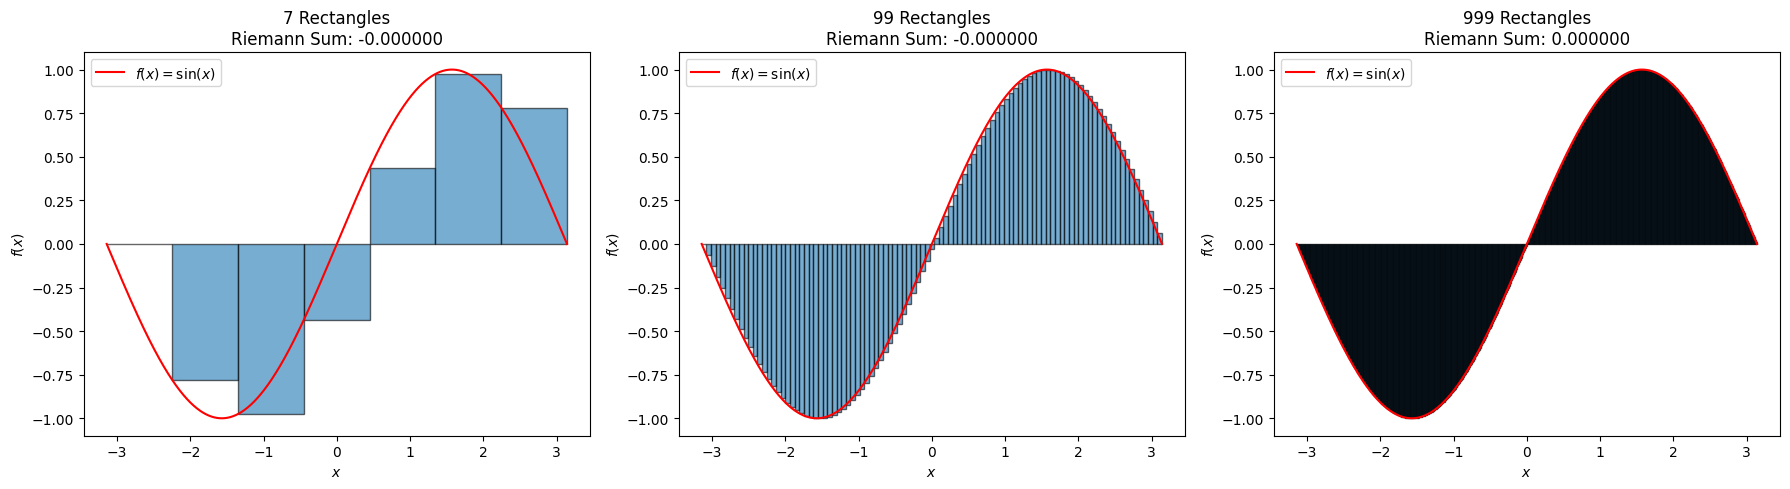

In [2]:
# Interval [-pi, pi]
a = -np.pi
b = np.pi

# Define the function f(x) = sin(x)
def f(x):
    return np.sin(x)

# Prepare the plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Calculate and plot the Riemann sums
for i, n in enumerate([7,99,999]):
    riemann_sum_value, x, dx = riemann_sum(f, a, b, n)
    axs[i].bar(x, f(x), width=dx, align="edge", alpha=0.6, edgecolor="black")
    axs[i].plot(np.linspace(a, b, 1000), f(np.linspace(a, b, 1000)), "r-", label=r"$f(x) = \sin(x)$")
    axs[i].set_title(f"{n} Rectangles\nRiemann Sum: {riemann_sum_value:.6f}")
    axs[i].set_xlabel("$x$")
    axs[i].set_ylabel("$f(x)$")
    axs[i].legend()

# Format and display the plot
plt.tight_layout()
plt.show()

```{admonition} Note
:class: note
Before integrating, always check the symmetry of the function about the center of the integration range. You can avoid computing the integral if it is symmetric, like the sine function. This type of intuition can prove useful in the chemical sciences.
```

## Calculating the Overlap Integral of Two H 1s Orbitals

### The Hydrogen 1s Orbital

Now, let's calculate the overlap integral of two hydrogen 1s orbitals, which are given by:

$$
\psi_{1s} = \frac{1}{\sqrt{\pi}} \left( \frac{1}{a_0} \right)^{3/2} e^{-r / a_0}
$$

where $a_0$ is the Bohr radius, which is approximately 0.529 Å. This integral is tough to solve in spherical coordinates, but we can convert it to Cartesian coordinates and use numerical integration. Recall that $r$ is related to $x$, $y$, and $z$ as:

$$
r = \sqrt{x^2 + y^2 + z^2}
$$

Therefore, we can rewrite the hydrogen 1s orbital in Cartesian coordinates as:

$$
\psi_{1s} = \frac{1}{\sqrt{\pi}} \left( \frac{1}{a_0} \right)^{3/2} e^{-\sqrt{x^2 + y^2 + z^2} / a_0}
$$

### Computing the Overlap Integral

To determine the total overlap of the hydrogen 1s orbitals of two electrons, we need to integrate over all possible space where those orbitals can overlap, from $-\infty$ to $\infty$ in all three dimensions. For two hydrogen atoms separated by a distance of $1.4 a_0$ along the $x$-axis, the overlap integral is given by:

$$
S = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \psi_{1s}^*(x + 0.7 a_0, y, z) \psi_{1s}(x - 0.7 a_0, y, z) dx dy dz
$$

### Numerical Integration Using a Riemann Sum

OK, so what do we have to do to compute this integral? First, we must define the $x$, $y$, and $z$ ranges over which we will integrate. Then, we need to define the function we are integrating. Finally, we need to integrate the function over the ranges we defined. Let's do this now.

In [14]:
def overlap_integral(N, grid_range, separation):
    """
    Computes the overlap integral using the Riemann sum with a uniform grid.

    Parameters:
    N (int): Number of grid points along each axis.
    grid_range (float): The range for x, y, z in Bohr radii.
    separation (float): Separation distance between the centers of the two atomic orbitals.

    Returns:
    float: The computed overlap integral.
    """

    # Create grid points and calculate step size
    x = np.linspace(0, grid_range, N)
    dx = grid_range / N

    # Create 3D grids for x, y, and z
    X, Y, Z = np.meshgrid(x, x, x, indexing='ij')

    # Compute the distances r1 and r2
    r1 = np.sqrt((X + separation / 2) ** 2 + Y ** 2 + Z ** 2)
    r2 = np.sqrt((X - separation / 2) ** 2 + Y ** 2 + Z ** 2)

    # Compute the integrand for all points in the grid
    integrand_value = np.exp(-(r1 + r2))

    # Apply the Riemann sum
    S_sum = np.sum(integrand_value) * dx**3

    # Apply the normalization factor
    normalization_factor = 8 / np.pi
    S = normalization_factor * S_sum

    return S

# Example usage
S = overlap_integral(N=100, grid_range=7, separation=1.4)
print(f"Overlap integral S using the Riemann sum is approximately: {S:.6f}")

Overlap integral S using the Riemann sum is approximately: 0.800392


````{margin}
```{note}
**Vectorized** refers to a method of performing operations on entire arrays or collections of data simultaneously, rather than applying the operation element by element in a loop. In NumPy, vectorization allows you to write cleaner and more efficient code by taking advantage of optimized low-level operations.
```
````

The above code computes the overlap integral of two hydrogen 1s orbitals using a Riemann sum with a uniform grid. The function `overlap_integral` takes three arguments: `N`, `grid_range`, and `separation`. The `N` argument specifies the number of grid points along each axis, while the `grid_range` argument specifies the range for $x$, $y$, and $z$ in Bohr radii. The `separation` argument specifies the separation distance between the centers of the two atomic orbitals. The function returns the computed overlap integral. The code uses NumPy's vectorized operations to compute the overlap integral efficiently.

### Numerical Integration Using the Trapezoidal Rule

The trapezoidal rule is a numerical integration method that approximates the integral of a function by dividing the interval into small trapezoids. The area of each trapezoid is calculated and summed to approximate the integral. The trapezoidal rule is more accurate than the Riemann sum because it approximates the function with straight lines instead of rectangles. The trapezoidal rule can be applied to multidimensional integrals by applying the rule along each axis. The trapezoidal rule is implemented in the `scipy.integrate.trapezoid` function, which computes the integral of a function using the trapezoidal rule. Let's rewrite the overlap integral function using the trapezoidal rule.

In [41]:
from scipy.integrate import trapezoid

def overlap_integral_trapezoid(N=100, grid_range=7, separation=0.7):
    """
    Computes the overlap integral using the trapezoidal rule with a uniform grid.

    Parameters:
    N (int): Number of grid points along each axis.
    grid_range (float): The range for x, y, z in Bohr radii.
    separation (float): Separation distance between the centers of the two atomic orbitals.

    Returns:
    float: The computed overlap integral.
    """

    # Create grid points and calculate step size
    x = np.linspace(0, grid_range, N)
    dx = grid_range / N

    # Create 3D grids for x, y, and z
    X, Y, Z = np.meshgrid(x, x, x, indexing='ij')

    # Compute the distances r1 and r2
    r1 = np.sqrt((X + separation / 2) ** 2 + Y ** 2 + Z ** 2)
    r2 = np.sqrt((X - separation / 2) ** 2 + Y ** 2 + Z ** 2)

    # Compute the integrand for all points in the grid
    integrand_value = np.exp(-(r1 + r2))
    
    # Apply the trapezoidal rule along each axis
    integral_x = trapezoid(integrand_value, x, axis=0)
    integral_y = trapezoid(integral_x, x, axis=0)
    S_sum = trapezoid(integral_y, x, axis=0)

    # Apply the normalization factor
    normalization_factor = 8 / np.pi
    S = normalization_factor * S_sum

    return S

# Example usage
S_trapezoid = overlap_integral_trapezoid(N=100, grid_range=7, separation=0.7)
print(f"Overlap integral S using the trapezoidal rule is approximately: {S_trapezoid:.6f}")

Overlap integral S using the trapezoidal rule is approximately: 0.925286


The trapezoidal rule gives a different result than the Riemann sum because it approximates the function with straight lines instead of rectangles. Ultimately, the trapezoidal rule is more accurate than the Riemann sum because it approximates the function more closely. How can we verify that the trapezoidal rule is more accurate than the Riemann sum? We can compare the results of the two methods to an analytical solution.

### Analytical Solution

The analytical solution to the overlap integral of two hydrogen 1s orbitals separated by a distance $R$ is given by:

$$
S = \left( 1 + R + \frac{R^2}{3} \right) e^{-R}
$$

Let's compute the overlap integral using the analytical solution and compare it with the results obtained using the Riemann sum and the trapezoidal rule.

In [16]:
import pandas as pd

# Separation values between the two hydrogen atoms in Bohr radii
R_values = np.linspace(0.5, 5, 10)

# Function to compute analytical overlap integral
def analytical_overlap_integral(R):
    """
    Computes the analytical overlap integral.

    Parameters:
    R (float): Separation distance between the centers of the two atomic orbitals in Bohr radii.

    Returns:
    float: The analytical overlap integral.
    """
    return (1 + R + R**2 / 3) * np.exp(-R)

# Lists to store the results
analytical_results = []
riemann_results = []
trapezoidal_results = []

# Compute the overlap integral for different separation values
for R in R_values:
    S_analytical = analytical_overlap_integral(R)
    S_riemann = overlap_integral(N=100, grid_range=7, separation=R)
    S_trapezoidal = overlap_integral_trapezoid(N=100, grid_range=7, separation=R)
    analytical_results.append(S_analytical)
    riemann_results.append(S_riemann)
    trapezoidal_results.append(S_trapezoidal)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    "Separation (Bohr radii)": R_values,
    "Riemann Sum": riemann_results,
    "Trapezoidal Rule": trapezoidal_results,
    "Analytical": analytical_results
})

# Display the results
results_df

,Separation (Bohr radii),Riemann Sum,Trapezoidal Rule,Analytical
0,0.5,1.031785,0.960320,0.960340
1,1.0,0.916888,0.858367,0.858385
2,1.5,0.769971,0.725154,0.725173
3,2.0,0.619271,0.586435,0.586453
4,2.5,0.481598,0.458290,0.458308
5,3.0,0.364650,0.348493,0.348509
6,3.5,0.270172,0.259179,0.259194
7,4.0,0.196617,0.189247,0.189262
8,4.5,0.140951,0.136072,0.136085
9,5.0,0.099762,0.096565,0.096577


The trapezoidal rule is more accurate than the Riemann sum for all separation values. Let's visualize the results to see how the overlap integral changes with the separation distance between the two hydrogen atoms.

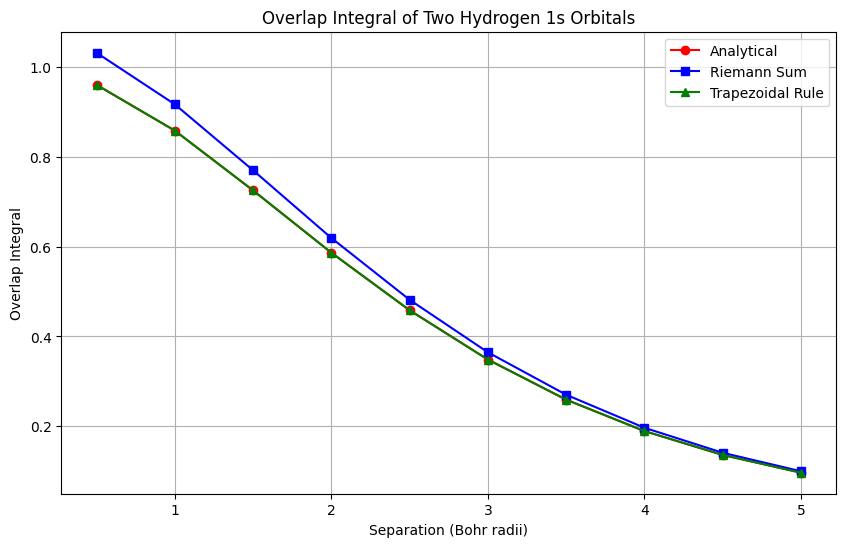

In [17]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(R_values, analytical_results, "ro-", label="Analytical")
plt.plot(R_values, riemann_results, "bs-", label="Riemann Sum")
plt.plot(R_values, trapezoidal_results, "g^-", label="Trapezoidal Rule")
plt.xlabel("Separation (Bohr radii)")
plt.ylabel("Overlap Integral")
plt.title("Overlap Integral of Two Hydrogen 1s Orbitals")
plt.legend()
plt.grid(True)
plt.show()

The plot shows that the overlap integral decreases as the separation distance between the two hydrogen atoms increases. The analytical solution, the Riemann sum, and the trapezoidal rule all give consistent results, with the trapezoidal rule being the most accurate. The analytical solution provides a reference for the accuracy of the numerical methods.

## Hands-On Activity: Overlap of Two He 1s Orbitals

Now, let's calculate the overlap integral of two He 1s orbitals, which are given by:

$$
\psi_{1s} = \frac{1}{\sqrt{\pi}} \left( \frac{2}{a_0} \right)^{3/2} e^{-2r / a_0}
$$

where $a_0$ is the Bohr radius, which is approximately 0.529 Å.

```{admonition} Wait!
:class: warning
Do you think the overlap integral will decay more slowly or more rapidly for He compared to H? Do particles become more or less localized as the charge increases? In other words, do particles become more classical or more quantum mechanical as the size of the nucleus increases?
```

In [23]:
grid_N = 100
integral_range = 7
sep = 1.4

In [25]:
x = np.linspace(0, integral_range, grid_N, endpoint=False)
dx = integral_range / grid_N

In [29]:
X_grid, Y_grid, Z_grid = np.meshgrid(x, x, x, indexing='ij')

In [30]:
r1 = np.sqrt((X_grid - sep/2)**2 + Y_grid**2 + Z_grid**2)
r2 = np.sqrt((X_grid + sep/2)**2 + Y_grid**2 + Z_grid**2)
integrand = np.exp(-2*(r1+r2))
integral = trapezoid(trapezoid(trapezoid(integrand, x), x), x) # triple integral
norm_factor = 8 * 2**(4/3) / np.pi
result = norm_factor * integral
result

np.float64(0.12284203899518399)

In [58]:
def helium_overlap(grid_N, integral_range, sep):
    x = np.linspace(0, integral_range, grid_N, endpoint=False)
    dx = integral_range / grid_N
    X_grid, Y_grid, Z_grid = np.meshgrid(x, x, x, indexing='ij')
    r1 = np.sqrt((X_grid - sep/2)**2 + Y_grid**2 + Z_grid**2)
    r2 = np.sqrt((X_grid + sep/2)**2 + Y_grid**2 + Z_grid**2)
    integrand = np.exp(-2*(r1+r2))
    integral = trapezoid(trapezoid(trapezoid(integrand, x, axis=0), x, axis=0), x, axis=0) # triple integral
    norm_factor = 8 * 2**3 / np.pi
    result = norm_factor * integral
    return result

In [59]:
seps = np.linspace(0.005, 5, 20)
he_overlaps = [helium_overlap(100, 13, sep) for sep in seps]
h_overlaps = [overlap_integral_trapezoid(100, 13, sep) for sep in seps]

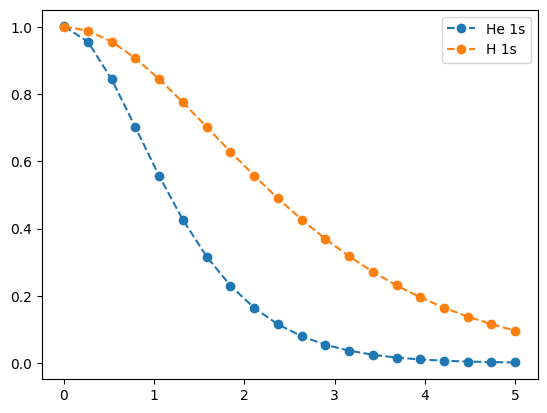

In [60]:
fig, ax = plt.subplots()
ax.plot(seps, he_overlaps, 'o--', label="He 1s")
ax.plot(seps, h_overlaps, 'o--', label="H 1s")
ax.legend()